# walmart project!!

In [1]:
#importing libraies
import pandas as pd
import numpy as np


In [2]:
#loading dataset
df = pd.read_csv("/Users/users/Downloads/Walmart_Store_sales.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#checking dtypes and changing neccesary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df["Store"] = df["Store"].astype("category")

In [7]:
df["Holiday_Flag"] = df["Holiday_Flag"].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 316.0 KB


In [9]:
#Max sales
df["Weekly_Sales"].argmax()   #1905 is row index with highest sales
df["Store"].iloc[1905]      #store 14 has max sales

14

In [10]:
#max standard deviation and coffient i.e mean to std
std = df.groupby("Store").apply(np.std)
mean = df.groupby("Store").apply(np.mean)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [11]:
coff = mean/std

In [12]:
std.idxmax()   #store 14 has max std  #idxmax gives index of max values of cols

Weekly_Sales    14
Temperature     40
Fuel_Price      18
CPI              9
Unemployment     4
dtype: int64

In [13]:
coff.idxmax()      #store 37 has max cofficeint i.e mean/std

Weekly_Sales    37
Temperature     36
Fuel_Price      13
CPI              4
Unemployment    14
dtype: int64

In [14]:
#creating year month and  week col
import datetime
data =  df["Date"].dt.isocalendar()
df["month"] = df["Date"].dt.month
df = pd.concat([df,data],axis=1)

In [15]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,week,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,17,7
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,48,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7,5
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8,5
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,18,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   month         6435 non-null   int64         
 9   year          6435 non-null   UInt32        
 10  week          6435 non-null   UInt32        
 11  day           6435 non-null   UInt32        
dtypes: UInt32(3), category(2), datetime64[ns](1), float64(5), int64(1)
memory usage: 460.6 KB


In [17]:
#changing dtype of year and week
df["year"] = df["year"].astype("category")
df["month"] = df["month"].astype("category")
df["week"] = df["week"].astype("category")

In [18]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,week,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,17,7
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,48,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7,5
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8,5
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,18,1


In [19]:
df["Q"] = df["Date"].dt.quarter

In [20]:
data = df[["Store","Weekly_Sales","year","Q"]]

In [21]:
data.head()

,Store,Weekly_Sales,year,Q
0,1,1643690.90,2010,2
1,1,1641957.44,2010,4
2,1,1611968.17,2010,1
3,1,1409727.59,2010,1
4,1,1554806.68,2010,2


In [22]:
year2012 = data[data["year"]== 2012]

In [23]:
year2012.head()

,Store,Weekly_Sales,year,Q
100,1,1550369.92,2012,2
101,1,1459601.17,2012,1
102,1,1394393.84,2012,1
103,1,1319325.59,2012,1
104,1,1636339.65,2012,1


In [24]:
q2_2012 = year2012[year2012["Q"]==2]
q2_2012.head()

,Store,Weekly_Sales,year,Q
100,1,1550369.92,2012,2
113,1,1899676.88,2012,2
114,1,1621031.70,2012,2
115,1,1521577.87,2012,2
116,1,1468928.37,2012,2


In [25]:
q3_2012 = year2012[year2012["Q"]==3]
q3_2012.head()

,Store,Weekly_Sales,year,Q
109,1,1675431.16,2012,3
122,1,1697230.96,2012,3
127,1,1527014.04,2012,3
128,1,1497954.76,2012,3
129,1,1439123.71,2012,3


In [26]:
q2_store_mean = q2_2012.groupby("Store").apply(np.mean)

In [27]:
q3_store_mean = q3_2012.groupby("Store").apply(np.mean)

In [28]:
q3_growth = ((q3_store_mean - q2_store_mean)/q2_store_mean)*100 

In [29]:
q3_growth.idxmax()

Weekly_Sales    16
Q                1
dtype: int64

In [30]:
q3_growth.drop("Q",axis=1,inplace=True)

In [31]:
q3_growth.idxmax()
       #store 16 has max quarterly growth rate in Q3’2012 

Weekly_Sales    16
dtype: int64

In [32]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,week,day,Q
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,17,7,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,48,4,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7,5,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8,5,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,18,1,2


In [33]:
df_without_holidays = df[df["Holiday_Flag"]==0]
mean_without_holidays = df_without_holidays["Weekly_Sales"].mean()
mean_without_holidays

1041256.3802088564

In [34]:
df_with_holidays = df[df["Holiday_Flag"]==1]

In [35]:
df_with_holidays["month"].unique()

[12, 10, 11, 9, 7]
Categories (5, int64): [12, 10, 11, 9, 7]

In [36]:
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13  2nd month (not avaliable)
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13  7th month week is 28
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13  11th month week is 47
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13  12th month  week is 52
# now i can sperate the holidays on basis of month
Labourday = df_with_holidays[df_with_holidays["month"]==7]
thanksg = df_with_holidays[df_with_holidays["month"]==11]
chritmas = df_with_holidays[df_with_holidays["month"]==12]

In [37]:
mean_without_holidays

1041256.3802088564

In [38]:
#stores having more that mean of non-holiday sales.(Labour_day)
Labourday[Labourday["Weekly_Sales"]>mean_without_holidays]
#labourday has higher sales than mean  non-holiday sales.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,week,day,Q
135,1,2012-07-09,1661767.33,1,83.96,3.730,222.439015,6.908,7,2012,28,1,3
278,2,2012-07-09,1898777.07,1,87.65,3.730,222.074763,6.565,7,2012,28,1,3
564,4,2012-07-09,2125104.72,1,82.09,3.709,130.932548,4.077,7,2012,28,1,3
850,6,2012-07-09,1608077.01,1,86.33,3.730,224.056008,5.668,7,2012,28,1,3
1422,10,2012-07-09,1708283.28,1,83.07,4.124,130.932548,7.170,7,2012,28,1,3
1565,11,2012-07-09,1304584.40,1,85.17,3.730,225.966026,6.334,7,2012,28,1,3
1851,13,2012-07-09,2165796.31,1,70.65,3.689,130.932548,5.765,7,2012,28,1,3
1994,14,2012-07-09,1904512.34,1,75.70,3.911,191.577676,8.684,7,2012,28,1,3
2423,17,2012-07-09,1255633.29,1,61.99,3.689,130.932548,5.936,7,2012,28,1,3
2566,18,2012-07-09,1083521.24,1,71.85,3.921,138.472936,8.535,7,2012,28,1,3


In [39]:
thnksg = thanksg[thanksg["week"]==47]
thnksg["Date"].unique() #contains 2 days 26 and 25 but thanksgiving was only on 26th

array(['2010-11-26T00:00:00.000000000', '2011-11-25T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [40]:
thankgiving = thnksg[thnksg["Date"]=='2011-11-25T00:00:00.000000000']

In [41]:
#thanksgiving holiday also have positive effect on sales on most stores
thankgiving[thankgiving["Weekly_Sales"]>mean_without_holidays]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,week,day,Q
94,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866,11,2011,47,5,4
237,2,2011-11-25,2614202.30,1,56.36,3.236,218.113027,7.441,11,2011,47,5,4
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143,11,2011,47,5,4
809,6,2011-11-25,2249811.55,1,62.78,3.236,220.041741,6.551,11,2011,47,5,4
1095,8,2011-11-25,1235163.86,1,49.61,3.236,221.949157,6.123,11,2011,47,5,4
1381,10,2011-11-25,2950198.64,1,60.68,3.760,129.836400,7.874,11,2011,47,5,4
1524,11,2011-11-25,1848953.48,1,70.03,3.236,221.901118,7.197,11,2011,47,5,4
1667,12,2011-11-25,1591920.42,1,53.25,3.622,129.836400,12.890,11,2011,47,5,4
1810,13,2011-11-25,2864170.61,1,38.89,3.445,129.836400,6.392,11,2011,47,5,4
1953,14,2011-11-25,2685351.81,1,48.71,3.492,188.350400,8.523,11,2011,47,5,4


In [42]:
chritmas["Date"].unique()  #only 30th and 31st are holidays not 2nd

array(['2010-12-02T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [43]:
Christmas = chritmas[chritmas["Date"]!='2010-12-02T00:00:00.000000000']


In [44]:
#stores having higher sales than non holidays sales
Christmas[Christmas["Weekly_Sales"]>mean_without_holidays] #stores having higher sales than mean of non-holidays at christmas

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,week,day,Q
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,12,2010,52,5,4
99,1,2011-12-30,1497462.72,1,44.55,3.129,219.535990,7.866,12,2011,52,5,4
190,2,2010-12-31,1750434.55,1,47.30,2.943,211.064774,8.163,12,2010,52,5,4
242,2,2011-12-30,1874226.52,1,44.57,3.129,219.177306,7.441,12,2011,52,5,4
476,4,2010-12-31,1794868.74,1,38.09,2.955,127.087677,7.127,12,2010,52,5,4
528,4,2011-12-30,2007105.86,1,36.89,3.119,130.071032,5.143,12,2011,52,5,4
762,6,2010-12-31,1464050.02,1,49.14,2.943,212.914967,7.007,12,2010,52,5,4
814,6,2011-12-30,1598080.52,1,46.80,3.129,221.128263,6.551,12,2011,52,5,4
1334,10,2010-12-31,1707298.14,1,49.67,3.148,127.087677,9.003,12,2010,52,5,4
1386,10,2011-12-30,1930690.37,1,48.92,3.428,130.071032,7.874,12,2011,52,5,4


In [45]:
#above analysis shows some stores has higher sales i.e. positive impact holidays are determined

In [46]:
#importing libraies for data visualization
import matplotlib as plt
import seaborn as sns

In [47]:
dff = df[["Weekly_Sales","Store","month","year"]]

In [48]:
sales_per_month2010 = dff[dff["year"]==2010]
sales_per_month2011 = dff[dff["year"]==2011]
sales_per_month2012 = dff[dff["year"]==2012]

In [49]:
#goruping data by month

In [50]:
sales_2010 = sales_per_month2010.groupby("month").mean()

In [51]:
sales_2011 = sales_per_month2011.groupby("month").mean()

In [52]:
sales_2012 = sales_per_month2012.groupby("month").mean()


<AxesSubplot:xlabel='month'>

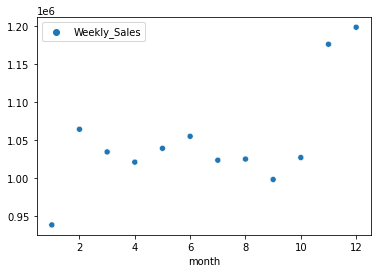

In [53]:
sns.scatterplot(data=sales_2010)
#In 2010
#here we can see month 1 has low sales and 12 highest sales
#12and 11 has more than others because of the holiday thankgiving(11) and christmas(12)


<AxesSubplot:xlabel='month'>

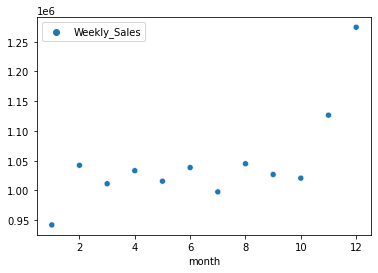

In [54]:
sns.scatterplot(data=sales_2011)
#In 2011
#here we can see month 1 has low sales and 12 highest sales
#12and 11 has more than others because of the holiday thankgiving(11) and christmas(12)
#11th month sales are not that signifiantly high than that in 2010

<AxesSubplot:xlabel='month'>

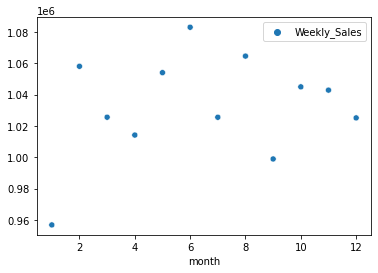

In [55]:
sns.scatterplot(data=sales_2012)
#In 2012
#here we can see that sales are more than 1.05e+06 which is not in 2010 and 2011 (except month 1,11 and 12 in 2010and2011)
#highest sales is of 6th month and lowest is of 1st month

In [56]:
#sales in 2012 are more consistent thorugh the year 
#sales in 2011 and 2010 are almost similar but month11 has significant diffrence

# Linear Regression  model

In [57]:
#dataset 
df.head()
df["day"] = df["Date"].dt.dayofyear #marking the day of the year

In [58]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,week,day,Q
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,17,122,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,48,336,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7,50,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8,57,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,18,123,2


In [59]:
df.shape

(6435, 13)

In [60]:
#Converting the data types as per col data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   month         6435 non-null   category      
 9   year          6435 non-null   category      
 10  week          6435 non-null   category      
 11  day           6435 non-null   int64         
 12  Q             6435 non-null   int64         
dtypes: category(5), datetime64[ns](1), float64(5), int64(2)
memory usage: 438.8 KB


In [62]:
df["Q"] = df["Q"].astype('category')
df["day"] = df["day"].astype('category')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   category      
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   month         6435 non-null   category      
 9   year          6435 non-null   category      
 10  week          6435 non-null   category      
 11  day           6435 non-null   category      
 12  Q             6435 non-null   category      
dtypes: category(7), datetime64[ns](1), float64(5)
memory usage: 363.4 KB


In [64]:
#stats data of numerical colunms
df.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


In [65]:
#Temprrature ,Fuel_Price anf Unemployment mean and mediean are alamost close, so we can say they are normaliy distributed.
#lets check and convert the rest

In [66]:
#data visualization for distubution analysis (skweness)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

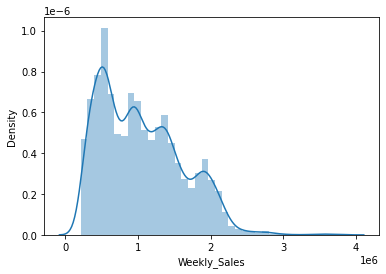

In [67]:
#for weekly_sales
sns.distplot(df["Weekly_Sales"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

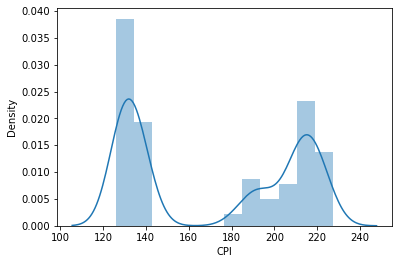

In [68]:
#for CPI
sns.distplot(df["CPI"])

In [69]:
#log transformation
df["CPI"] = df["CPI"].apply(np.log1p)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

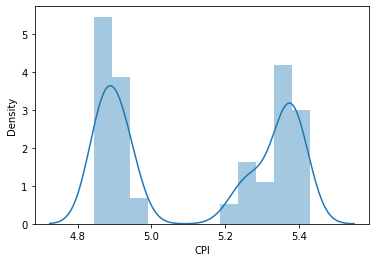

In [70]:
#viewing it again 
sns.distplot(df["CPI"])
#better than before

In [71]:
df.describe()
#better distribution of data now

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,5.124311,7.999151
std,5.643666e+05,18.444933,0.459020,0.231237,1.875885
min,2.099862e+05,-2.060000,2.472000,4.844691,3.879000
25%,5.533501e+05,47.460000,2.933000,4.888355,6.891000
50%,9.607460e+05,62.670000,3.445000,5.212849,7.874000
75%,1.420159e+06,74.940000,3.735000,5.364776,8.622000
max,3.818686e+06,100.140000,4.468000,5.430366,14.313000


In [72]:
#checking for missing values
df.isna().sum()
#no na values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
month           0
year            0
week            0
day             0
Q               0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

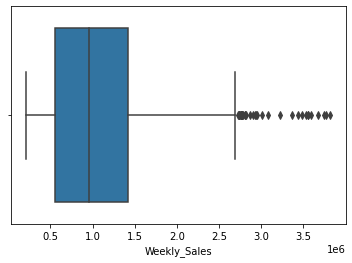

In [73]:
#checking for outliers if any
sns.boxplot(df["Weekly_Sales"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

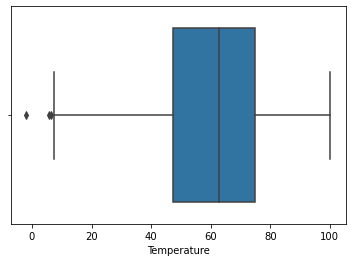

In [74]:
sns.boxplot(df["Temperature"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPI'>

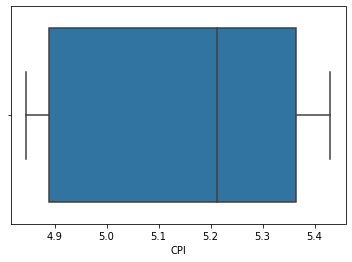

In [75]:
sns.boxplot(df["CPI"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment'>

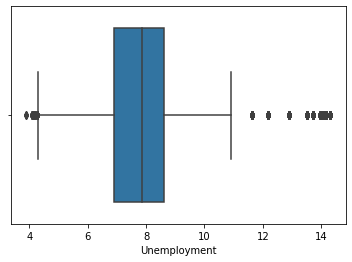

In [76]:
sns.boxplot(df["Unemployment"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Price'>

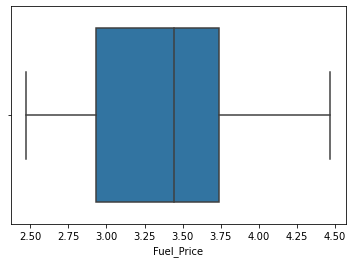

In [77]:
sns.boxplot(df["Fuel_Price"])

In [78]:
#only temprature has 1 outlier(low) and alot outliers in Unemployment
#we can either discard them or consider as it is because replcaing them can change informations of impact on sales

In [79]:
#bivariate analysis

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

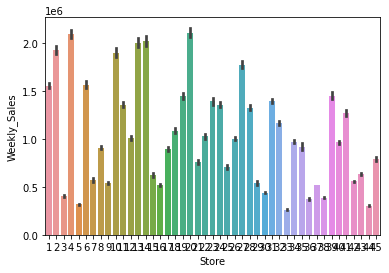

In [80]:
sns.barplot(df["Store"], df["Weekly_Sales"])
#almost same for all stores

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

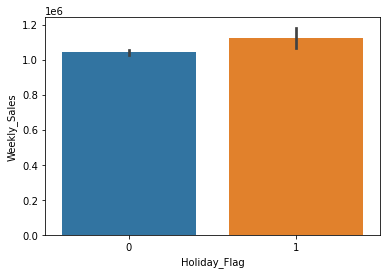

In [81]:
sns.barplot(df["Holiday_Flag"], df["Weekly_Sales"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Temperature'>

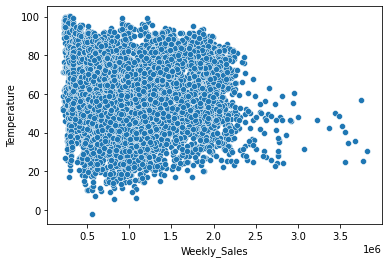

In [82]:
sns.scatterplot(df["Weekly_Sales"],df["Temperature"])
#not much effect of temp on weekly sales

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales', ylabel='CPI'>

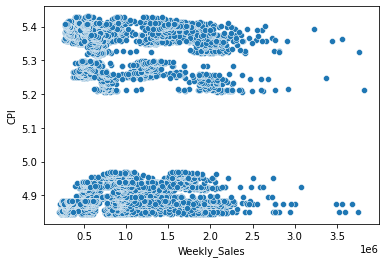

In [83]:
sns.scatterplot(df["Weekly_Sales"],df["CPI"])
#can't understand much form this

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Fuel_Price'>

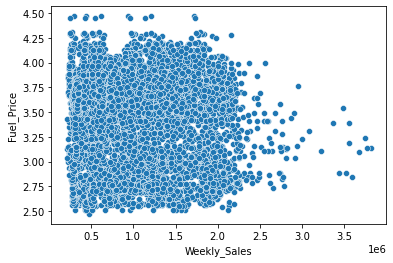

In [84]:
sns.scatterplot(df["Weekly_Sales"],df["Fuel_Price"])
#not much relationship between sales and fuel price of that week

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Unemployment'>

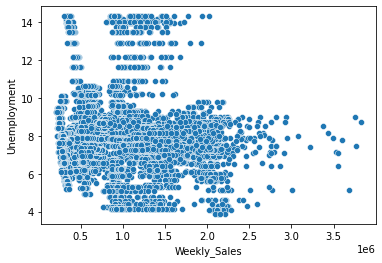

In [85]:
sns.scatterplot(df["Weekly_Sales"],df["Unemployment"])
#not much relationship between sales and fuel price of that week

In [86]:
df.corr()
#not mush corelation between the numerical variables and weekly_sales

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063810,0.009464,-0.069761,-0.106176
Temperature,-0.063810,1.000000,0.144982,0.163618,0.101158
Fuel_Price,0.009464,0.144982,1.000000,-0.170365,-0.034684
CPI,-0.069761,0.163618,-0.170365,1.000000,-0.301654
Unemployment,-0.106176,0.101158,-0.034684,-0.301654,1.000000


In [87]:
#importing sklearn libraies 

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [89]:
#Data preprocessing

In [90]:
#sperating category and numeric independent variables

In [91]:
df_cat = df.select_dtypes(include='category')

In [92]:
df_num = df.select_dtypes(exclude='category')

In [93]:
df_num = df_num.drop(["Date","Weekly_Sales"],axis=1)
df_num.head()

,Temperature,Fuel_Price,CPI,Unemployment
0,42.31,2.572,5.357041,8.106
1,38.51,2.548,5.357728,8.106
2,39.93,2.514,5.357949,8.106
3,46.63,2.561,5.358093,8.106
4,46.50,2.625,5.358237,8.106


In [94]:
#scaling of df_num 

In [95]:
sc = MinMaxScaler()
df_sc = sc.fit_transform(df_num)

In [96]:
df_numsc = pd.DataFrame(df_sc,index=df_num.index,columns=df_num.columns)

In [97]:
df_numsc.head()

,Temperature,Fuel_Price,CPI,Unemployment
0,0.434149,0.050100,0.874802,0.405118
1,0.396967,0.038076,0.875975,0.405118
2,0.410861,0.021042,0.876353,0.405118
3,0.476419,0.044589,0.876598,0.405118
4,0.475147,0.076653,0.876844,0.405118


In [98]:
#one-knot coding of cat data

In [99]:
df_cat1 = pd.get_dummies(df_cat)

In [100]:
df_cat1.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,day_350,day_351,day_357,day_358,day_364,day_365,Q_1,Q_2,Q_3,Q_4
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
#final dataset
df_final = pd.concat([df_numsc,df_cat1,df["Weekly_Sales"]],axis=1)

In [102]:
df_final.head()

,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,...,day_351,day_357,day_358,day_364,day_365,Q_1,Q_2,Q_3,Q_4,Weekly_Sales
0,0.434149,0.050100,0.874802,0.405118,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1643690.90
1,0.396967,0.038076,0.875975,0.405118,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1641957.44
2,0.410861,0.021042,0.876353,0.405118,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1611968.17
3,0.476419,0.044589,0.876598,0.405118,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1409727.59
4,0.475147,0.076653,0.876844,0.405118,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1554806.68


In [103]:
#spliting in train and test data
x= df_final.drop("Weekly_Sales",axis=1)
y = df_final["Weekly_Sales"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 10)

In [104]:
#model bluiding
lm = LinearRegression()
#fitting
modeltest = lm.fit(x_train,y_train)

In [105]:
#perdiction
pred = modeltest.predict(x_test)

In [106]:
#accaccuracy_score
r2_score(y_test,pred)

0.961291448468839

In [107]:
#acc of training dataset
r2_score(y_train,modeltest.predict(x_train))

0.9637257691487772

In [108]:
#no overfitting problem in modeltest model of linear regression 


In [109]:
#feature selection (just checking without CPI, unemployment, and fuel price  )

In [110]:
rfe = RFE(lm, n_features_to_select=None)

In [111]:
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression())

In [112]:
xref = x[x_train.columns[rfe.support_]]

In [113]:
x_train, x_test, y_train, y_test = train_test_split(xref, y, test_size=.3, random_state = 10)

In [114]:
modelref = lm.fit(x_train,y_train)

In [115]:
preds = modelref.predict(x_test)

In [116]:
r2_score(y_test,preds)

0.9487173877810177

In [117]:
r2_score(y_train,modelref.predict(x_train))

0.9517189830557531

In [118]:
#rfe shows that CPI, unemployment, and fuel price are insignificant but acc of modelref is less than modeltest

In [119]:
#modeltest can be better than modelref so maybe  CPI, unemployment, and fuel price are significant.

In [120]:
#lets decide by cross-validation

In [121]:
from sklearn.model_selection import cross_validate

In [122]:
test_cv = cross_validate(lm, x,y, cv = 20, return_train_score=True)

In [123]:
test_cv["train_score"].mean()

0.9636459394085479

In [124]:
ref_cv = cross_validate(lm, xref,y, cv = 20, return_train_score=True)

In [125]:
ref_cv["train_score"].mean()

0.9515541162618503

In [126]:
#mdoeltest is better than modelref so we can say CPI, unemployment, and fuel price are significant.